<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/10_Spectral_element_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spectral element interpolation

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences. https://doi.org/10.1016/j.cageo.2021.105007.
<br>
<br>

####Spectral elements

Spectral elements are a special kind of irregular grid in which the points are defined onto a GLL basis and then mapped to the desired shape. They are powerful tools in numerical methods, especially for solving partial differential equations, as they allow for a combination of high accuracy with great flexibility.
<br>
<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import lagrange

In [ ]:
# Set the parameters below

# N: number of points

if __name__ == "__main__":

  N = 1000

In [ ]:
# Use the following function or define your own

if __name__ == "__main__":

  f = lambda x: np.cos (3 * np.exp (x))

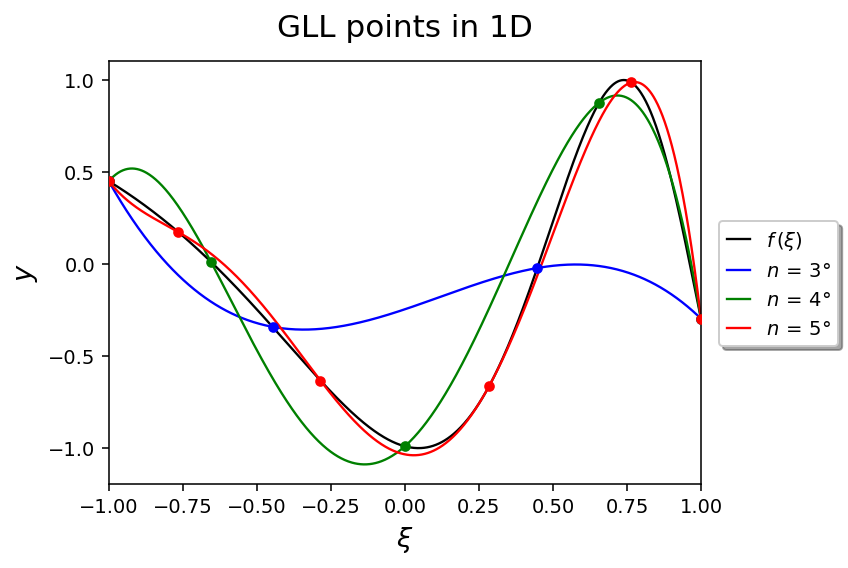

In [ ]:
if __name__ == "__main__":

  xn1 = np.array ([-1.0, -0.447, 0.447, 1.0])
  yn1 = f (xn1)

  xn2 = np.array ([-1.0, -0.655, 0.0, 0.656, 1.0])
  yn2 = f (xn2)

  xn3 = np.array ([-1.0, -0.765, -0.285, 0.285, 0.765, 1.0])
  yn3 = f (xn3)

  xi = np.linspace (-1.0, 1.0, N)

  lg1 = lagrange (xn1, yn1)
  lg2 = lagrange (xn2, yn2)
  lg3 = lagrange (xn3, yn3)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  p1, = plt.plot (xi, f (xi), linewidth = 1.2,
                  color = 'black', zorder = 1)
  p2, = plt.plot (xi, lg1 (xi), linewidth = 1.2,
                  color = 'blue', zorder = 2)
  p3, = plt.plot (xi, lg2 (xi), linewidth = 1.2,
                  color = 'green', zorder = 2)
  p4, = plt.plot (xi, lg3 (xi), linewidth = 1.2,
                  color = 'red', zorder = 2)

  plt.scatter (xn1, yn1, marker = 'o', s = 20,
               color = 'blue', zorder = 3)
  plt.scatter (xn2, yn2, marker = 'o', s = 20,
               color = 'green', zorder = 3)
  plt.scatter (xn3, yn3, marker = 'o', s = 20,
               color = 'red', zorder = 3)

  plt.xlim (-1.0, 1.0) 
  plt.xlabel (r'$\xi$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)

  fig.legend ([p1, p2, p3, p4],
              [r'$f\,(\xi)$', r'$n\,=\,3\degree$',
               r'$n\,=\,4\degree$', r'$n\,=\,5\degree$'],
               loc = 'center right', shadow = True,
               framealpha = 1.0, handlelength = 1.2, fontsize = 10)

  plt.title ('GLL points in 1D', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####1D Interpolation

In one dimension, regardless of the shape functions (i.e., the transformation of the spectral element), we can directly interpolate the spectral element just by fitting a polynomial. However, for higher dimensions, the elements distortion can compromise the condition of linearly-independent coordinates. We can always fit a polynomial surface, provided that we give it the number of degrees of freedom needed, but the interpolation may suffer.

Fitting an underdetermined surface and imposing some smoothness condition may work sometimes, but good results are never a guarantee. Nevertheless, as previously mentioned, spectral elements in their natural base are (literally) designed for interpolation. The GLL nodes give the best polynomial fitting for a given degree while still including the boundaries of the interval $[-1,\,1]$.
<br>
<br>
The shape functions are the map that transforms a $\xi$ value from the standard basis to an $x$ value on another basis (the corresponding coordinate in the deformed spectral element). If the map is linear, inverting it is trivial and, given a $x_i$ value, we can use the inverse map to calculate the corresponding $\xi_i$ value.
<br>
<br>
When the map is nonlinear, numerical optimization methods (such as *Newton's method*) can be used to reverse the mapping. Once we found $\xi_i$, we can interpolate the value using Lagrange or generic interpolation.
<br>
<br>
The spectral element we shall use as an example has five GLL points, and the position of the nodes (the central and the two boundary points) determines the shape function.
<br>
<br>

In [ ]:
# Set the parameters below

# xin: nodes xi values
# xn: nodes x values

# xi: GLL points in the xi direction

if __name__ == "__main__":

  xin = np.array ([-1.0, 0.0, 1.0])
  xn  = np.array ([ 0.2, 1.1, 2.6])

  xi = np.array ([-1.0, -0.65465367, 0, 0.65465367, 1.0])

With three node points, the shape function needs a second-degree map to be capable of fitting any values:
<br>
<br>
\begin{equation}
  x
  \,=\,a_0
  \,+\,a_1\,\xi
  \,+\,a_2\,{\xi}^2
\end{equation}
<br>
<br>
From the node points $(\xi_n,\,x_n)$, we determine the coefficients above.
<br>
<br>

In [ ]:
def cN (x, n):
  """
  Returns x to the power of n
  """
  return x ** n


def coefficientsShape1D (xin, yn):
  """
  Computes the coefficients of the shape
  function from the nodes
  """
  n = xin.size

  M = np.matrix (np.zeros ((n, n)))
  v = np.matrix (np.reshape (yn, (n, 1)))

  for i in range (n):

    for j in range (n):

      M[i, j] = cN (xin[i], j)

  return np.array (np.linalg.solve (M, v)).flatten ()


def shape1D (xi, a):
  """
  Returns the interpolated value at xi
  """
  s = np.zeros (xi.size)

  for i in range (a.size):

    s += a[i] * cN (xi, i)

  return s

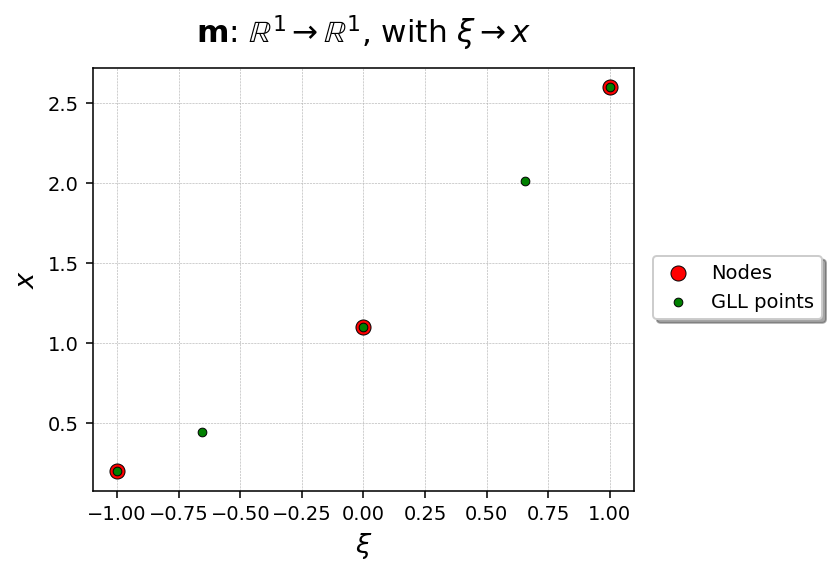

In [ ]:
if __name__ == "__main__":

  mp = coefficientsShape1D (xin, xn)
  x  = shape1D (xi, mp)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  plt.scatter (xin, xn, marker = 'o', s = 60, facecolor = 'red',
               edgecolor = 'black', linewidth = 0.5, zorder = 2,
               label = r'Nodes')
  plt.scatter (xi, x, marker = 'o', s = 20, facecolor = 'green',
               edgecolor = 'black', linewidth = 0.5, zorder = 3,
               label = r'GLL points')

  plt.xlabel (r'$\xi$', fontsize = 14)
  plt.ylabel (r'$x$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.3)
  plt.title (r'$\mathbf{m}$: $\mathbb{R}^1\,\to\,'\
             r'\mathbb{R}^1$, with $\xi\,\to\,x$',
              fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.77)

  plt.show ()

In our case, the Jacobian is just the derivative of the shape function:
<br>
<br>
\begin{equation}
  J
  \,=\,a_1
  \,+\,2\,a_2\,{\xi}
\end{equation}
<br>
<br>

In [ ]:
def jacobian1D (xi, a):
  """
  Returns the Jacobian value at xi
  """
  J = 0

  for i in range (1, a.size):

    J += i * a[i] * cN (xi, i - 1)

  return J

Now, we need a function that implements the *Newton's method* (or another optimization method) to undo the mapping.
<br>
<br>

In [ ]:
def newton1D (mp, x, xi0 = 0, epsilon = 1e-12, max_iterations = 30):
  """
  Finds the value of xi using Newton's method.
  """  
  xi = np.array ([xi0])

  for i in range (max_iterations):

    fxi = shape1D (xi, mp) - x

    if abs (fxi) < epsilon:

      return xi

    J = jacobian1D (xi, mp)

    if J == 0:

      print ('Singular Jacobian. No solution found.')

      return None

    xi = xi - fxi / J

  print ('Exceeded maximum iterations. No solution found.')

  return None


def unmap1D (xx, mp):
  """
  Unmaps all values of x
  """
  N = xx.size

  xxi = np.empty (N)

  for i in range (N):

    xxi[i] = newton1D (mp, xx[i])
  
  return xxi

In [ ]:
def lagrange (x, xn):
  """
  Creates the Lagrage polynomials
  """
  N = x.size
  n = xn.size

  L = np.ones ((n, N))

  for i in range (n):

    for j in range (n):

      if i != j:

        L[i] *= (x - xn[j]) / (xn[i] - xn[j])

  return L


def lagInt1D (x, xn, yn):
  """
  Interpolates a 1D set of points
  using Lagrange polynomials
  """
  N = x.size
  n = xn.size

  L = lagrange (x, xn)

  y = np.zeros (N)

  for i in range (n):

    y += yn[i] * L[i]

  return y

In [ ]:
# Use the following function or define your own

if __name__ == "__main__":

  f = lambda x: np.sin (1.5 * x)

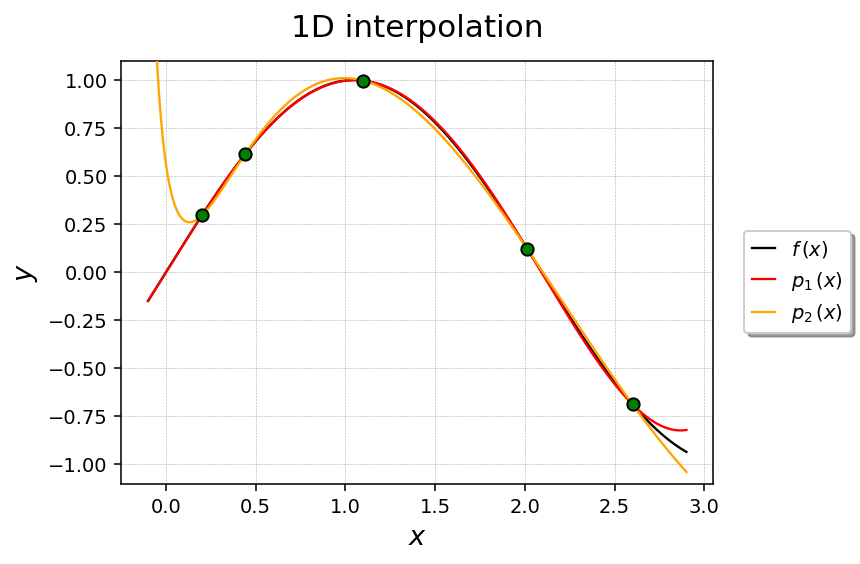

In [ ]:
if __name__ == "__main__":

  x = shape1D (xi, mp)

  xmin = min (x) - 0.3
  xmax = max (x) + 0.3

  xx = np.linspace (xmin, xmax, N)
  pp = lagInt1D (xx, x, f (x))

  xxi = unmap1D (xx, mp)
  ppi = lagInt1D (xxi, xi, f (x))

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  plt.plot (xx, f (xx), color = 'black', linewidth = 1.2, 
            label = r'$f\,(x)$', zorder = 2)
  plt.plot (xx, pp, color = 'red', linewidth = 1.2, 
            label = r'$p_1\,(x)$', zorder = 3)
  plt.plot (xx, ppi, color = 'orange', linewidth = 1.2, 
            label = r'$p_2\,(x)$', zorder = 4)
  
  plt.scatter (x, f (x), marker = 'o', s = 40, facecolor = 'green',
               edgecolor = 'black', linewidth = 1, zorder = 5)

  plt.ylim (-1.1, 1.1)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.2, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.3)
  plt.title ('1D interpolation', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

In the figure above, $p_1\,(x)$ is the result of the interpolation carried out directly in the new domain (with distorted coordinates), and $p_2\,(x)$ is the result after undoing the map and interpolating in the standard interval $[-1,\,1]$.
<br>
<br>
It's important to realize that the second method, in general, gives reliable results only when the $x$ values are unmapped to $\xi$ values that fall inside the standard interval. Because we defined the Lagrange polynomials for the whole space, in theory, they should also work outside the spectral element. However, when there are regions in which the Jacobian becomes singular, the unmapping cannot always be carried out. In the example above, the Jacobian matrix is singular for $\xi\,<\,0.1$. That is why the error of interpolation increases dramatically to the left of the leftmost node.
<br>
<br>
From that result alone, we might believe that the first method is superior. That conclusion, however, is precipitate. The only reason the first method performed better is that we are working in one dimension. As previously said, in higher dimensions, the loss of linear independence can ruin the interpolation.
<br>
<br>
An easy example is a 45&deg; rotation. If the spectral element 45&deg; rotated relatively to the standard base (a common situation), that maximizes the coupling between the variables and the direct interpolation performs very poorly.
<br>
<br>
The coordinate system itself can also be problematic. If the GLL mesh uses spherical coordinates, for example, not only 45&deg; rotations will exist throughout the grid but also singularities at the poles.
<br>
<br>
Cases like these show the importance of using the second method for multidimensional problems.
<br>
<br>

####2D interpolation

We can extend the same principles used in one dimension to any dimensional space. In 2D the shape functions take the following form:
<br>
<br>
\begin{equation}
  \mathbf{m}: \mathbb{R}^2\,\to\,\mathbb{R}^2,\quad\text{with}\,\left(\xi,\,\eta\right)\,\to\,\left(x,\,y\right)
\end{equation}
<br>
<br>
\begin{split}
  x
  \,&=\,a_{00}\\
  \,&+\,a_{10}\,\xi\,+\,a_{01}\,\eta\\
  \,&+\,a_{11}\,\xi\,\eta\,+\,a_{20}\,{\xi}^2\,+\,a_{02}\,{\eta}^2\\
  \,&+\,a_{21}\,{\xi}^2\,\eta\,+\,a_{12}\,\xi\,{\eta}^2\\
  \,&+\,a_{22}\,{\xi}^2\,{\eta}^2\\\\
  y
  \,&=\,b_{00}\\
  \,&+\,b_{10}\,\xi\,+\,b_{01}\,\eta\\
  \,&+\,b_{11}\,\xi\,\eta\,+\,b_{20}\,{\xi}^2\,+\,b_{02}\,{\eta}^2\\
  \,&+\,b_{21}\,{\xi}^2\,\eta\,+\,b_{12}\,\xi\,{\eta}^2\\
  \,&+\,b_{22}\,{\xi}^2\,{\eta}^2
\end{split}
<br>
<br>

In [ ]:
# Set the parameters below

# xin: nodes xi values
# etan: nodes eta values

# xi: GLL points in the xi direction
# eta: GLL points in the eta direction

# Xn: nodes x values for all (x, y) combinations
# Yn: nodes y values for all (x, y) combinations

if __name__ == "__main__":

  xin  = np.array ([-1.0, 0.0, 1.0])
  etan = np.array ([-1.0, 0.0, 1.0])

  xi  = np.array ([-1.0, -0.65465367, 0, 0.65465367, 1.0])
  eta = np.array ([-1.0, -0.65465367, 0, 0.65465367, 1.0])

  Xn = np.array ([[0.20, 1.20, 2.20],
                  [0.30, 1.10, 2.00],
                  [0.30, 1.07, 1.90]])

  Yn = np.array ([[0.20, 0.30, 0.35],
                  [1.10, 1.20, 1.40],
                  [2.00, 2.20, 2.60]])

In [ ]:
def cMN (x, y, m, n):
  """
  Returns x to the power of m
  times y to the power of n
  """
  return x ** m * y ** n


def coefficientsShape2D (Xn, Yn, Zn):
  """
  Computes the coefficients of the shape
  function from the nodes
  """
  m, n = Zn.shape

  mn = m * n

  M = np.matrix (np.empty ((mn, mn)))
  v = np.matrix (np.reshape (Zn, (mn, 1)))

  r = 0

  for i in range (m):

    for j in range (n):

      c = 0

      for ej in range (n):

        for ei in range (m):

          M[r, c] = cMN (Xn[i, j], Yn[i, j], ei, ej)

          c += 1
      
      r += 1

  return np.array (np.linalg.solve (M, v)).flatten ()


def shape2D (xi, eta, m, n, a, b):
  """
  Returns the interpolated value at xi and eta
  """
  sx = 0
  sy = 0

  r = 0

  for j in range (n):

    for i in range (m):

      sx += a[r] * cMN (xi, eta, i, j)
      sy += b[r] * cMN (xi, eta, i, j)

      r += 1

  return sx, sy

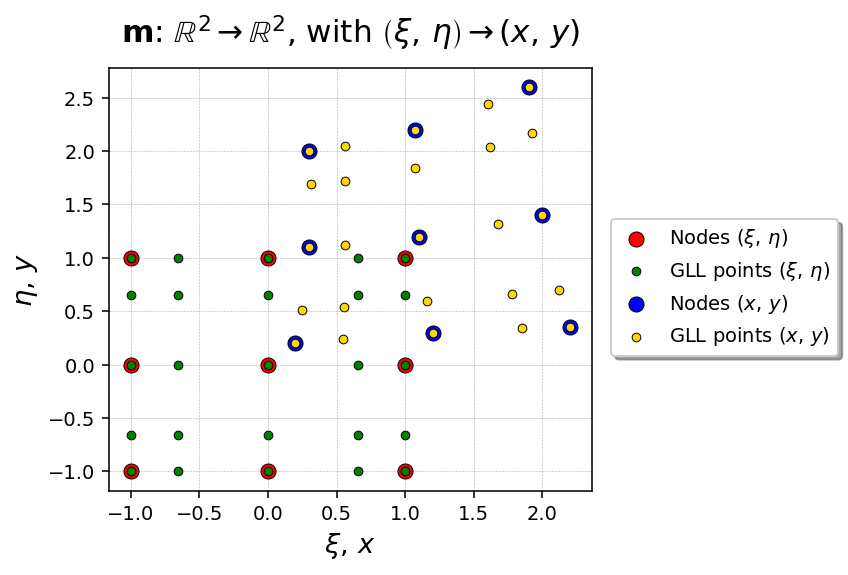

In [ ]:
if __name__ == "__main__":

  Xi, Eta   = np.meshgrid (xi, eta)
  Xin, Etan = np.meshgrid (xin, etan)

  mpx = coefficientsShape2D (Xin, Etan, Xn)
  mpy = coefficientsShape2D (Xin, Etan, Yn)

  m, n = Xin.shape

  x, y = shape2D (Xi, Eta, m, n, mpx, mpy)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  plt.scatter (Xin, Etan, marker = 'o', s = 60, facecolor = 'red',
               edgecolor = 'black', linewidth = 0.5, zorder = 2,
               label = r'Nodes $\left(\xi,\,\eta\right)$')
  plt.scatter (Xi, Eta, marker = 'o', s = 20, facecolor = 'green',
               edgecolor = 'black', linewidth = 0.5, zorder = 3,
               label = r'GLL points $\left(\xi,\,\eta\right)$')
  plt.scatter (Xn, Yn, marker = 'o', s = 60, facecolor = 'blue',
               edgecolor = 'black', linewidth = 0.5, zorder = 2,
               label = r'Nodes $\left(x,\,y\right)$')
  plt.scatter (x, y, marker = 'o', s = 20, facecolor = 'gold',
               edgecolor = 'black', linewidth = 0.5, zorder = 3,
               label = r'GLL points $\left(x,\,y\right)$')

  plt.xlabel (r'$\xi,\,x$', fontsize = 14)
  plt.ylabel (r'$\eta,\,y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.3)
  plt.title (r'$\mathbf{m}$: $\mathbb{R}^2\,\to\,\mathbb{R}^2$, '\
             r'with $\left(\xi,\,\eta\right)\,\to\,\left(x,\,y\right)$',
              fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.7)

  plt.show ()

The two-dimentional Jacobian matrix is:
<br>
<br>
\begin{equation}
  J\,=\,
  \begin{bmatrix}
    \displaystyle\frac{\partial x}{\partial \xi} &
    \displaystyle\frac{\partial x}{\partial \eta}\\
    \displaystyle\frac{\partial y}{\partial \xi} &
    \displaystyle\frac{\partial y}{\partial \eta}
  \end{bmatrix}
\end{equation}
<br>
<br>

In [ ]:
def jacobian2D (xi, eta, m, n, a, b):
  """
  Returns the Jacobian value at xi and eta
  """
  dx_dxi = 0
  dy_dxi = 0

  r = 0

  for j in range (n):

    for i in range (m):

      if i > 0:

        dx_dxi += i * a[r] * cMN (xi, eta, i - 1, j)
        dy_dxi += i * b[r] * cMN (xi, eta, i - 1, j)

      r += 1

  dx_deta = 0
  dy_deta = 0

  r = 0

  for j in range (n):

    for i in range (m):

      if j > 0:

        dx_deta += j * a[r] * cMN (xi, eta, i, j - 1)
        dy_deta += j * b[r] * cMN (xi, eta, i, j - 1)

      r += 1

  return np.matrix ([[dx_dxi, dx_deta],
                     [dy_dxi, dy_deta]])

Again, we can undo the mapping using *Newton's method*:
<br>
<br>

In [ ]:
def newton2D (mpx, mpy, x, y, m, n, xi0 = 0, eta0 = 0,
              epsilon = 1e-12, max_iterations = 30):
  """
  Finds the value of xi and eta using Newton's method.
  """  
  xi  = xi0
  eta = eta0

  for i in range (max_iterations):

    fxi, feta = shape2D (xi, eta, m, n, mpx, mpy)
    fxi -= x; feta -= y

    if abs (fxi) < epsilon and abs (feta) < epsilon:

      return xi, eta

    J = jacobian2D (xi, eta, m, n, mpx, mpy)

    if np.linalg.det (J) == 0:

      print ('Singular Jacobian. No solution found.')

      return None

    Ji = np.linalg.inv (J)

    v  = np.matrix ([[xi],
                     [eta]])

    fv = np.matrix ([[fxi],
                     [feta]])

    v = v - Ji * fv

    xi  = v[0, 0]
    eta = v[1, 0]

  print ('Exceeded maximum iterations. No solution found.')

  return None


def unmap2D (xx, yy, m, n, mpx, mpy):
  """
  Unmaps all values of x and y
  """
  Nx, Ny = xx.shape

  xxi  = np.empty ((Nx, Ny))
  eeta = np.empty ((Nx, Ny))

  for i in range (Nx):

    for j in range (Ny):

      xxi[i, j], eeta[i, j] = newton2D (mpx, mpy,
                                        xx[i, j], yy[i, j],
                                        m, n)
  
  return xxi, eeta

In [ ]:
def coefficients2D (Xn, Yn, Zn):
  """
  Computes coefficients from the
  data points
  """
  m, n = Zn.shape

  mn = m * n

  M = np.matrix (np.empty ((mn, mn)))
  v = np.matrix (np.reshape (Zn, (mn, 1)))

  r = 0

  for i in range (m):

    for j in range (n):

      c = 0

      for ej in range (n):

        for ei in range (m):

          M[r, c] = cMN (Xn[i, j], Yn[i, j], ei, ej)

          c += 1
      
      r += 1

  return np.array (np.linalg.solve (M, v)).flatten ()


def polyIntp2D (xx, yy, m, n, a):
  """
  Returns the interpolated value at x and y
  """
  Nx, Ny = xx.shape

  zz = np.zeros ((Nx, Ny))

  r = 0

  for j in range (n):

    for i in range (m):

      zz += a[r] * cMN (xx, yy, i, j)

      r += 1

  return zz

In [ ]:
# Set the parameters below

# Nx: number of points in the x direction
# Ny: number of points in the y direction

if __name__ == "__main__":

  Nx = 50
  Ny = 50

In [ ]:
# Use the following function or define your own

if __name__ == "__main__":

  f = lambda x, y: np.sin (np.sqrt (x ** 2 + y ** 2))

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

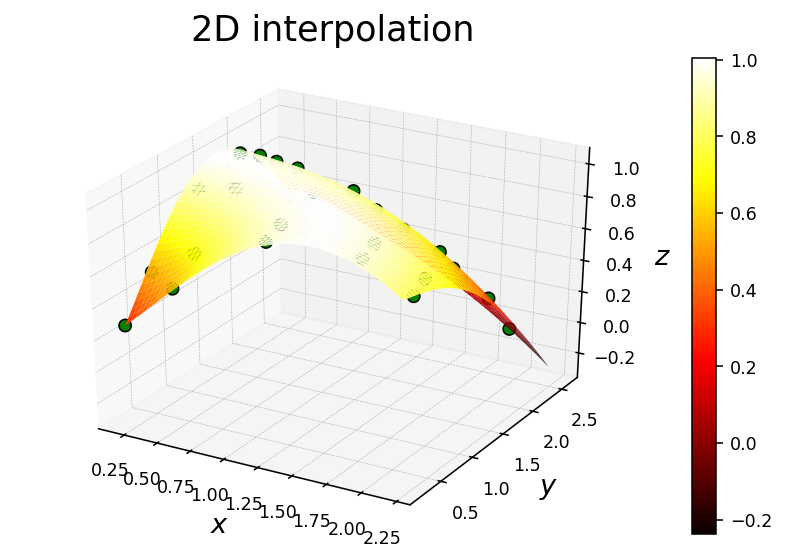

In [ ]:
if __name__ == "__main__":

  xmin = min (x.ravel ())
  xmax = max (x.ravel ())
  ymin = min (y.ravel ())
  ymax = max (y.ravel ())

  xx, yy = np.meshgrid (np.linspace (xmin, xmax, Nx),
                        np.linspace (ymin, ymax, Ny))

  xxi, eeta = unmap2D (xx, yy, m, n, mpx, mpy)

  c   = coefficients2D (Xi, Eta, f (x, y))
  ppi = polyIntp2D (xxi, eeta, xi.size, eta.size, c)

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.add_subplot (projection = '3d')

  surf = ax.plot_surface (xx, yy, ppi, cmap = cm.hot, zorder = 1)

  ax.scatter (x, y, f (x, y), marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)
  ax.set_xlim ()

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()

The same idea can be generalized to any number of dimensions for interpolating a set of data points in $\mathbb{R}^{n}$.
<br>
<br>

####References

“Bicubic interpolation.” *Wikipedia*, Wikimedia Foundation, 26 Apr. 2020, https://en.wikipedia.org/wiki/Bicubic_interpolation [Accessed 5 August 2020].
<br>
<br>
“Bilinear interpolation.” *Wikipedia*, Wikimedia Foundation, 18 May 2020, https://en.wikipedia.org/wiki/Bilinear_interpolation [Accessed 5 August 2020].
<br>
<br>
“Jacobian matrix and determinant.” *Wikipedia*, Wikimedia Foundation, 20 Jul. 2020, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant [Accessed 5 August 2020].
<br>
<br>
“Lagrange Interpolating Polynomial.” From Wolfram MathWorld, mathworld, https://mathworld.wolfram.com/LagrangeInterpolatingPolynomial.html [Accessed 4 August 2020].
<br>
<br>
“Lagrange polynomial.” *Wikipedia*, Wikimedia Foundation, 24 Jun. 2020, https://en.wikipedia.org/wiki/Lagrange_polynomial [Accessed 3 August 2020].
<br>
<br>
“Legendre polynomials.” *Wikipedia*, Wikimedia Foundation, 3 Jun. 2020, https://en.wikipedia.org/wiki/Legendre_polynomials [Accessed 5 August 2020].
<br>
<br>
Komatitsch, D., & Tromp, J. (2002). *Spectral-element simulations of global seismic wave propagation-I. Validation.* Geophysical Journal International, v. 149 n° 2, 390-412.
<br>
<br>
“Nodes and Weights of Gauss-Lobatto Calculator.” *Keisan Online Calculator*, Casio Computer Co. Ltd., 2015., https://keisan.casio.com/exec/system/1280801905 [Accessed 19 October 2015].
<br>
<br>
“Polynomial interpolation.” *Wikipedia*, Wikimedia Foundation, 26 Jun. 2020, https://en.wikipedia.org/wiki/Polynomial_interpolation [Accessed 5 August 2020].
<br>
<br>
Schuberth, B. (2003). *The spectral element method for seismic wave propagation.* (Doctoral dissertation, Master’s thesis, Ludwigs-Maximilians-Universität Munchen).